In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy as np
# import matplotlib
# matplotlib.use('qtagg')
import matplotlib.pyplot as plt
# plt.ion()
from pytrans.analysis.mode_solver import HarmonicTrap
from pytrans.ions import Ca40
from pytrans.plotting import plotting as pp

from pytrans.analysis import analyse_potential
from pytrans.plotting import plotting as pp

from models.surface_trap import SurfaceTrap

## SurfaceTrap

--------------
Trap potential analysis for ion Average[Ca40, Ca40]: 
Equilibrium position [um]
[-99.9771   0.      67.082 ]
Gradient [V/m]
[ 0.     -0.0031  0.0095]
Displacement at 1 MHz [um]
[ 0.     -0.0002  0.0006]
Hessian [V/m2]
[[ 1.6352e+07 -1.3184e+05  8.0400e+05]
 [-1.3184e+05  6.4877e+08  8.0000e+07]
 [ 8.0400e+05  8.0000e+07  5.4378e+08]]
Normal mode frequencies [MHz]
[0.999984 5.53304 6.50525]
Eigenvectors
[[-1 -0.000409 0.00159]
 [-0.00159 0.475 -0.88]
 [0.000394 0.88 0.475]]
Tilt angle of mode 2 (6.51): 28.36°
--------------
Mode solver analysis for ion crystal [Ca40, Ca40]: 
Equilibrium positions [um]
[[-102.7883   -0.001    67.0854]
 [ -97.1824    0.0013   67.0765]]
Normal modes
  Freq [MHz]                    Ca40                                Ca40
------------  ----------  ----------  ----------  ----------  ----------  ---------
      0.9996   0.7092      0.0001977  -0.0005458   0.705       0.0003755  -0.001692
      1.732    0.705       0.0001913  -0.0005228  -0.709

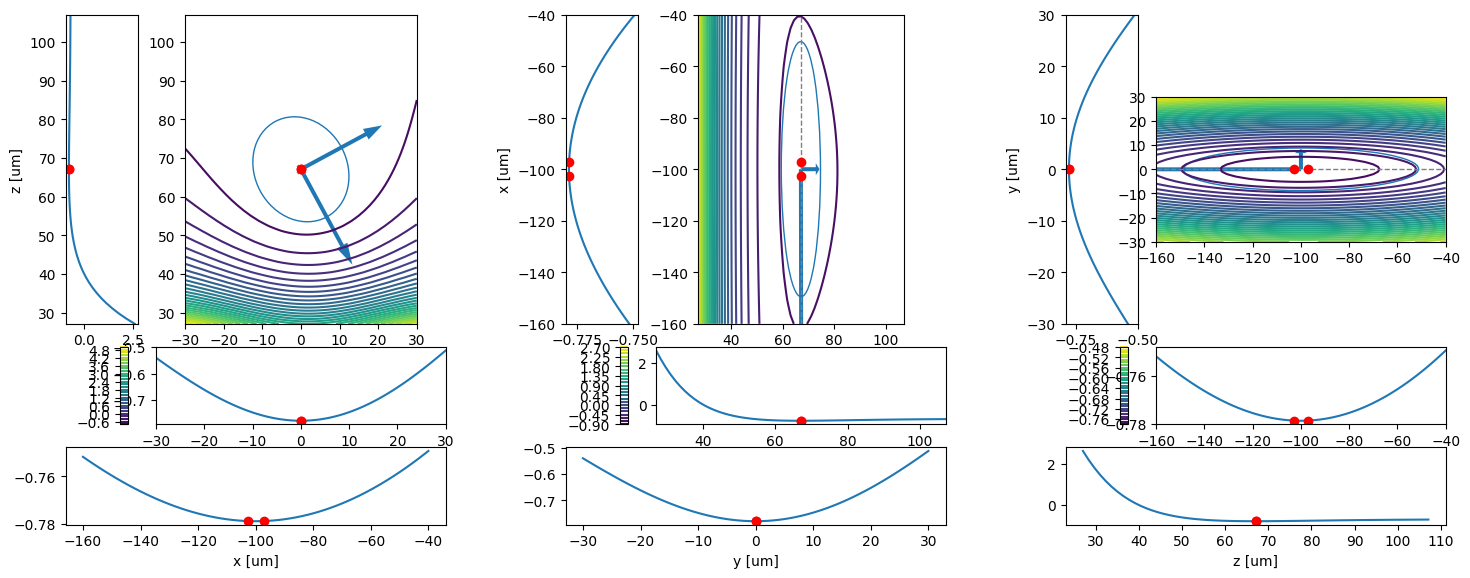

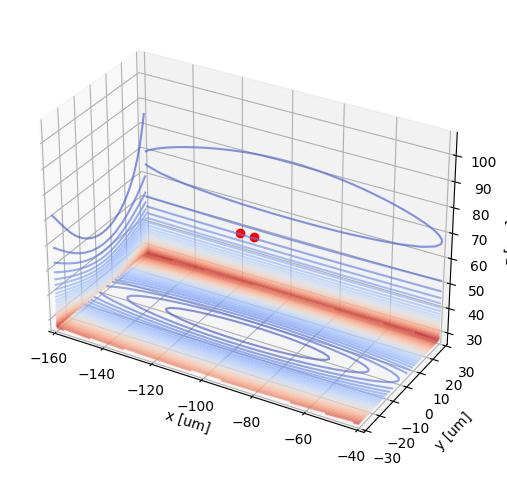

In [3]:
trap = SurfaceTrap()
voltages = np.load('transport\waveform.npy')[0]

r0 = [trap.x_ele(2), 0, trap.z0]
roi = (60e-6, 30e-6, 40e-6)
res = analyse_potential(trap, voltages, ions=[Ca40] * 2, r0=r0, verbose=False, roi=roi, plot=False)
# res
_plot_kw = dict(voltages=voltages, ion=Ca40, r0=r0, roi=roi, pseudo=True, analyse_results=res)

fig, axes = pp.plot_potential_make_layout(n=3)
for j, x in enumerate('xyz'):
    pp.plot_potential(trap, trap_axis=x, axes=axes[j], **_plot_kw)

fig, ax = pp.plot3d_potential(trap, **_plot_kw)
res

## HarmonicTrap

--------------
Trap potential analysis for ion Average[Ca40, Ca40, Ca40, Ca40]: 
Equilibrium position [um]
[0. 0. 0.]
Gradient [V/m]
[0. 0. 0.]
Displacement at 1 MHz [um]
[0. 0. 0.]
Hessian [V/m2]
[[ 1.6351e+07  0.0000e+00 -3.0000e+07]
 [ 0.0000e+00  3.6790e+07  0.0000e+00]
 [-3.0000e+07  0.0000e+00  1.4716e+08]]
Normal mode frequencies [MHz]
[0.774143 1.5 3.06606]
Eigenvectors
[[-0.977 0 -0.213]
 [0 1 0]
 [0.213 0 -0.977]]
Tilt angle of mode 2 (3.07): 90.00°
--------------
Mode solver analysis for ion crystal [Ca40, Ca40, Ca40, Ca40]: 
Equilibrium positions [um]
[[-6.9403 -0.4085 -1.5157]
 [-1.9337  1.4669 -0.4221]
 [ 1.9312 -1.4672  0.4216]
 [ 6.9382  0.4084  1.5155]]
Normal modes
  Freq [MHz]                   Ca40                                Ca40                                Ca40                                Ca40
------------  ---------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------
      0.

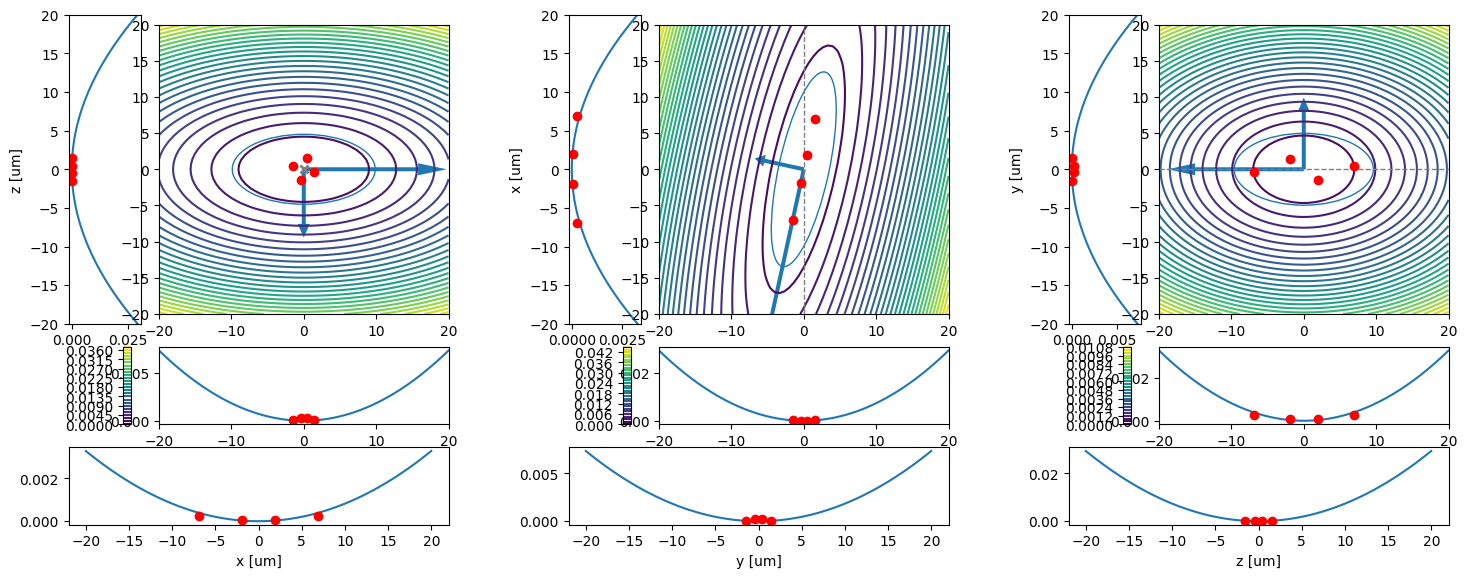

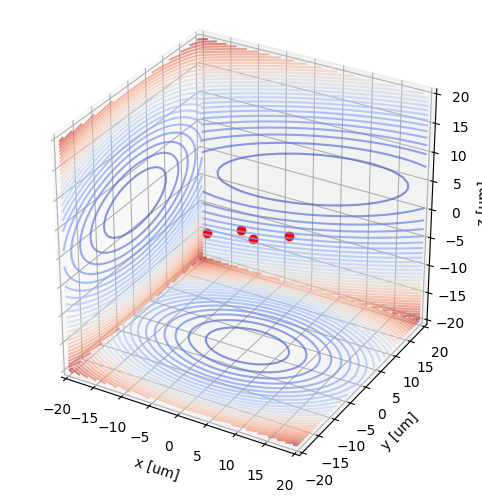

In [4]:
htrap = HarmonicTrap(fx=1e6, fy=1.5e6, fz=3e6, ion=Ca40, stray_field=[0, 0, 0], tilt_xz=-3e7)

r0 = (0, 0, 0)
roi = (20e-6, 20e-6, 20e-6)
res = analyse_potential(htrap, None, ions=[Ca40] * 4, r0=r0, verbose=False, roi=roi, plot=False)
# res
_plot_kw = dict(voltages=None, ion=Ca40, r0=r0, roi=roi, pseudo=True, analyse_results=res)

fig, axes = pp.plot_potential_make_layout(n=3)
for j, x in enumerate('xyz'):
    pp.plot_potential(htrap, trap_axis=x, axes=axes[j], **_plot_kw)

fig, ax = pp.plot3d_potential(htrap, **_plot_kw)
res